In [139]:
# Student ID: 1006842543
# Student Name: Sheng Zhang
# Student Email: eily.zhang@mail.utoronto.ca
# Instructor: Professor Shion Guha
# Course Code: INF2178
# Course Name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene

# Display the original dataframe
df = pd.read_csv("INF2178_A3_data.csv")
df

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,39.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,26.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,45.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,28.0,1


**Exploratory Data Analysis**

In [141]:
# Only keep the columns that we are interested in
columns_to_keep = ["fallreadingscore", "fallmathscore", "fallgeneralknowledgescore", "springreadingscore", "springmathscore", "springgeneralknowledgescore", "totalhouseholdincome", "incomegroup"]
df1 = df[columns_to_keep].copy()
df1

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,2
...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,1


In [142]:
# Refine the dataframe such that there is only one column of scores and another two tables indicating the semester and subject of the score

# Make a copy of the dataframe
df2=df1.copy()
# Rename the columns selected previously
df2.columns = ["FallReadingScore", "FallMathScore", "FallGeneralKnowledgeScore",
              "SpringReadingScore", "SpringMathScore", "SpringGeneralKnowledgeScore",
              "TotalHouseholdIncome", "IncomeGroup"]
# Define the new table shape
data = pd.melt(df2, id_vars=["TotalHouseholdIncome", "IncomeGroup"],
                    var_name="Subject", value_name="Score")
# Extracte Semester from Subject
data["Semester"] = data["Subject"].apply(lambda x: "Fall" if "fall" in x.lower() else "Spring")
# Keep only the Subject from the original column names
data["Subject"] = data["Subject"].apply(lambda x: x.replace("Fall", "").replace("Spring", "").replace("Score", "").strip())
# Display the new, refined dataframe
data

,TotalHouseholdIncome,IncomeGroup,Subject,Score,Semester
0,140000.0,3,Reading,36.580,Fall
1,120000.0,3,Reading,50.820,Fall
2,90000.0,3,Reading,40.680,Fall
3,50000.0,2,Reading,32.570,Fall
4,55000.0,2,Reading,31.980,Fall
...,...,...,...,...,...
71593,39000.0,1,GeneralKnowledge,20.189,Spring
71594,26000.0,1,GeneralKnowledge,32.357,Spring
71595,45000.0,2,GeneralKnowledge,19.803,Spring
71596,28000.0,1,GeneralKnowledge,35.991,Spring


In [143]:
# Create a summary table for all the continuous variales in the dataframe

# Drop the categorical variable "IncomeGroup" when computing statistics for continuous variables
data_numerical = data.drop("IncomeGroup", axis=1)
# Generate and siaplay the summary table
data_numerical.groupby(["Subject", "Semester"]).describe().transpose()

Subject                    GeneralKnowledge                          Math  \
Semester                               Fall         Spring           Fall   
TotalHouseholdIncome count     11933.000000   11933.000000   11933.000000   
                     mean      54317.199930   54317.199930   54317.199930   
                     std       36639.061147   36639.061147   36639.061147   
                     min           1.000000       1.000000       1.000000   
                     25%       27000.000000   27000.000000   27000.000000   
                     50%       47000.000000   47000.000000   47000.000000   
                     75%       72000.000000   72000.000000   72000.000000   
                     max      150000.000000  150000.000000  150000.000000   
Score                count     11933.000000   11933.000000   11933.000000   
                     mean         23.073694      28.235584      27.128244   
                     std           7.396978       7.577457       9.120505   
                     min           6.985000       7.858000      10.510000   
                     25%          17.385000      22.802000      20.680000   
                     50%          22.954000      28.583000      25.680000   
                     75%          28.305000      33.782000      31.590000   
                     max          47.691000      48.345000     115.650000   

Subject                                          Reading                 
Semester                           Spring           Fall         Spring  
TotalHouseholdIncome count   11933.000000   11933.000000   11933.000000  
                     mean    54317.199930   54317.199930   54317.199930  
                     std     36639.061147   36639.061147   36639.061147  
                     min         1.000000       1.000000       1.000000  
                     25%     27000.000000   27000.000000   27000.000000  
                     50%     47000.000000   47000.000000   47000.000000  
                     75%     72000.000000   72000.000000   72000.000000  
                     max    150000.000000  150000.000000  150000.000000  
Score                count   11933.000000   11933.000000   11933.000000  
                     mean       37.799461      35.954215      47.511178  
                     std        12.027753      10.473130      14.327111  
                     min        11.900000      21.010000      22.350000  
                     25%        29.270000      29.340000      38.950000  
                     50%        36.410000      34.060000      45.320000  
                     75%        44.220000      39.890000      51.770000  
                     max       113.800000     138.510000     156.850000

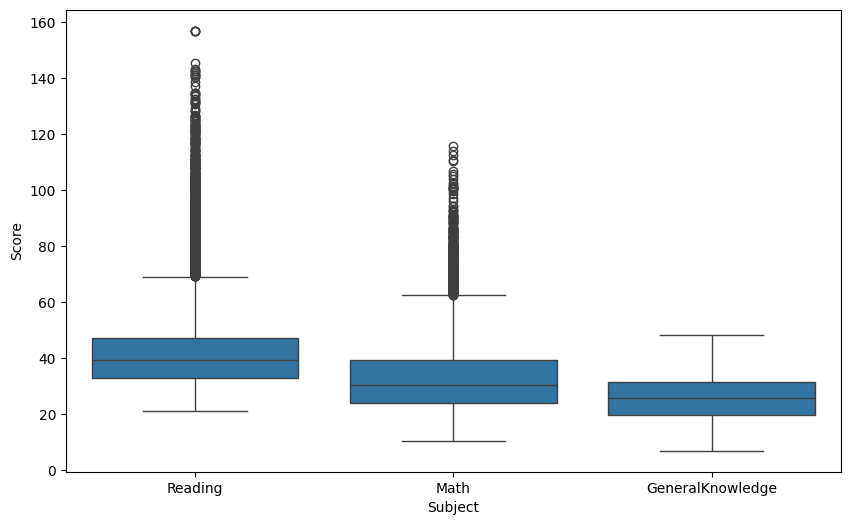

In [144]:
# Make the boxplot for Score between each Subject
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Subject", y="Score", data=data)
plt.show()

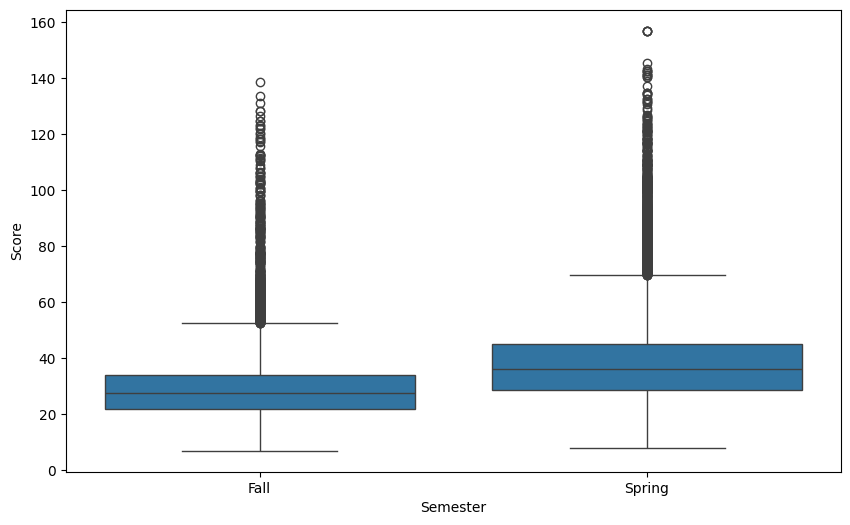

In [145]:
# Make the boxplot for Score between each Semester
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Semester", y="Score", data=data)
plt.show()

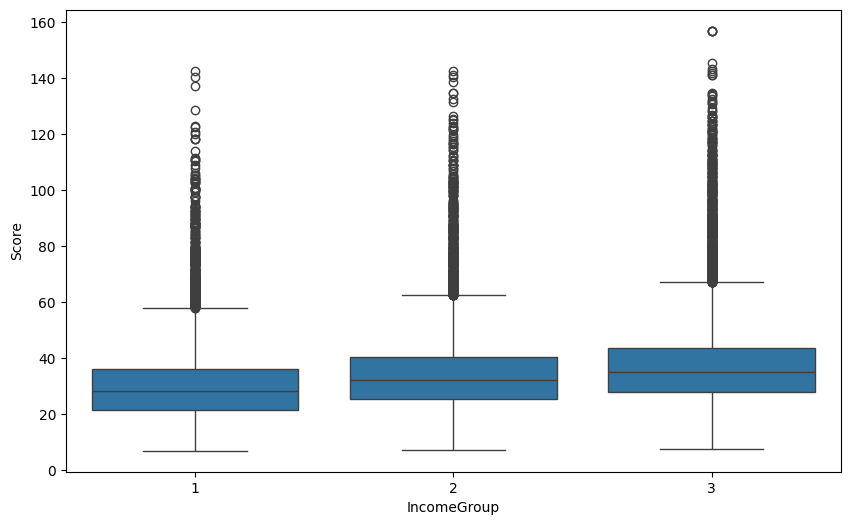

In [146]:
# Make the boxplot for Score between each IncomeGroup
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="IncomeGroup", y="Score", data=data)
plt.show()

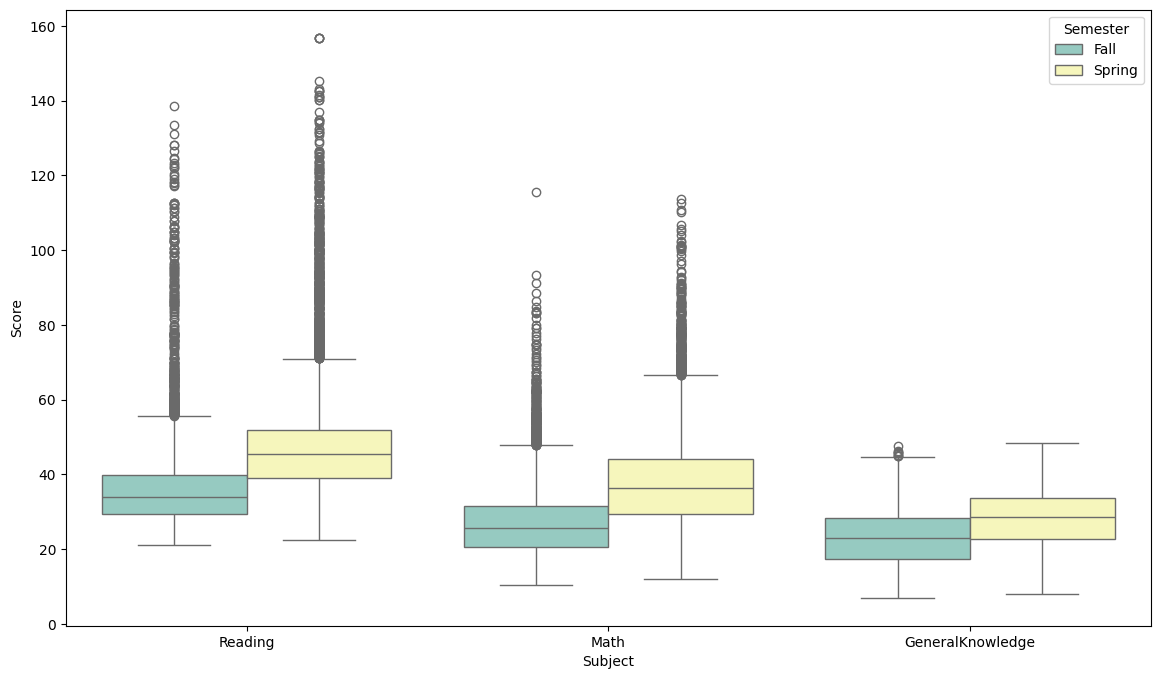

In [147]:
# Make the boxplot for Score between each Subject AND each Semester
plt.figure(figsize=(14, 8))
sns.boxplot(x="Subject", y="Score", hue="Semester", data=data, palette="Set3")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.show()

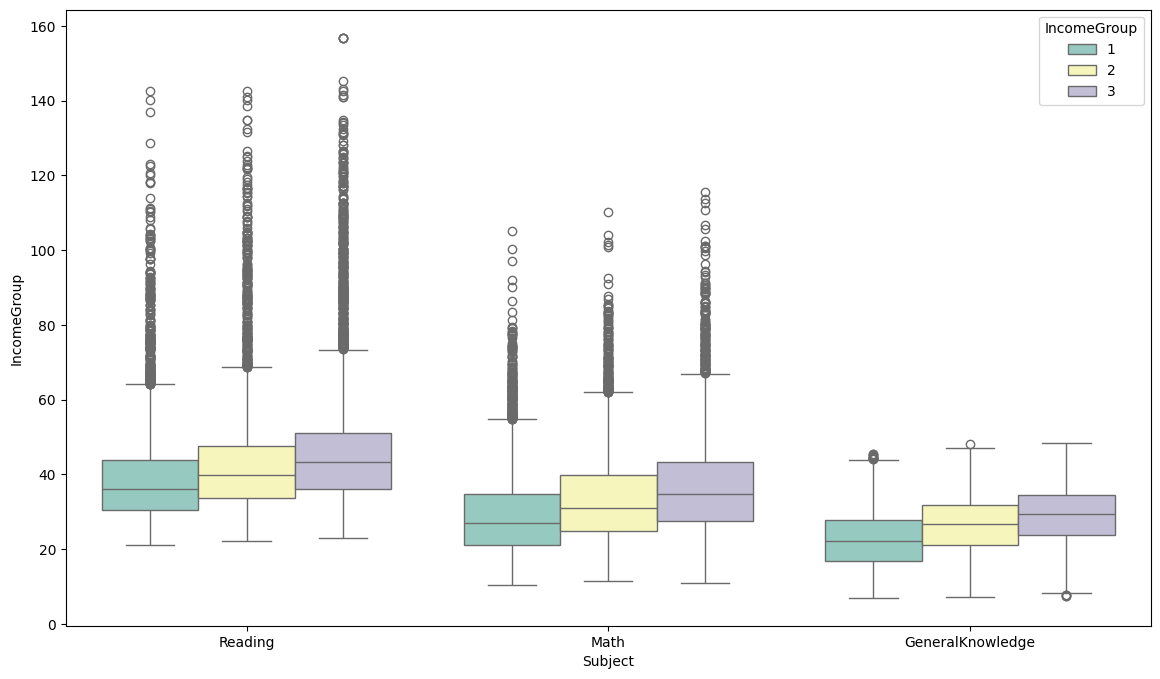

In [148]:
# Make the boxplot for Score between each Subject AND each IncomeGroup
plt.figure(figsize=(14, 8))
sns.boxplot(x="Subject", y="Score", hue="IncomeGroup", data=data, palette="Set3")
plt.xlabel("Subject")
plt.ylabel("IncomeGroup")
plt.show()

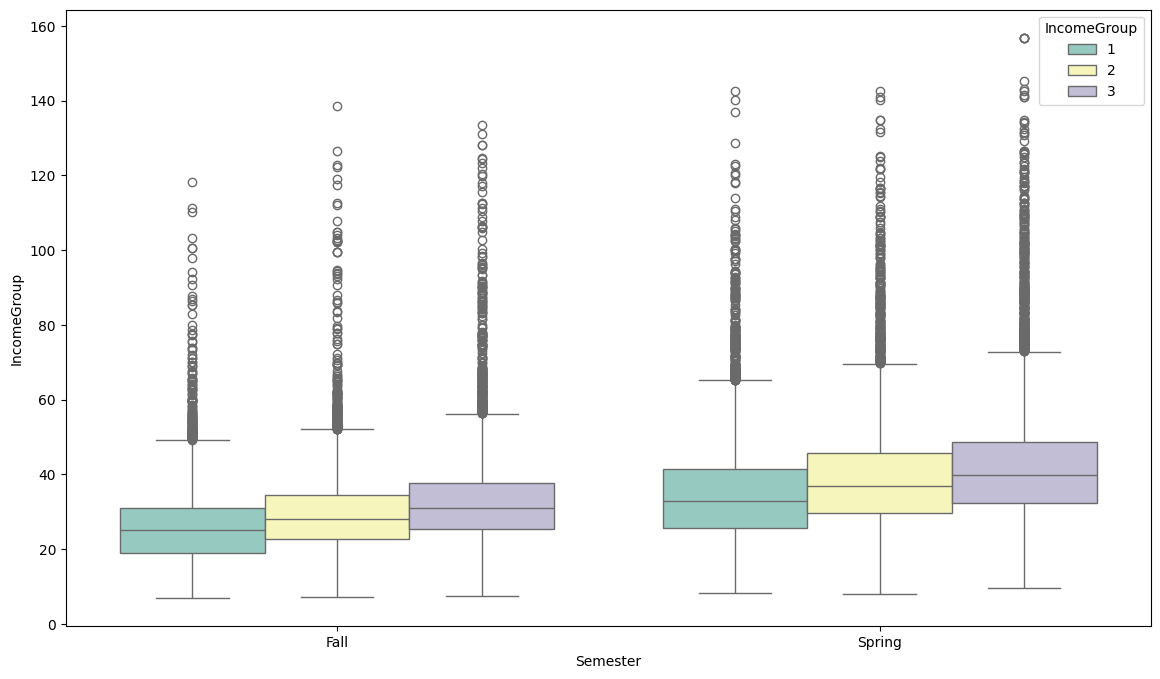

In [149]:
# Make the boxplot for Score between each Semester AND each IncomeGroup
plt.figure(figsize=(14, 8))
sns.boxplot(x="Semester", y="Score", hue="IncomeGroup", data=data, palette="Set3")
plt.xlabel("Semester")
plt.ylabel("IncomeGroup")
plt.show()

**One-Way ANCOVA: \\
Dependent Variable: Score \\
Groups: Semester: Fall, Spring \\
Covariate: TotalHouseholdIncome**

In [150]:
# Define a function to round the p-value
def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.05:
        return "<0.05"
    else:
        return f"{p:5.3}"

In [151]:
# Fit ANCOVA model with interaction term
model_SSS = ols("Score ~ Semester * TotalHouseholdIncome", data=data).fit()
# Print the model summary
print(model_SSS.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     5177.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:07:45   Log-Likelihood:            -2.7954e+05
No. Observations:               71598   AIC:                         5.591e+05
Df Residuals:                   71594   BIC:                         5.591e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [152]:
# Perform Tukey's HSD test
mc_SSS = MultiComparison(data["Score"], data["Semester"])
tukey_result_SSS = mc_SSS.tukeyhsd()
# Display the summary
print(tukey_result_SSS.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
  Fall Spring     9.13   0.0 8.9479 9.3122   True
-------------------------------------------------


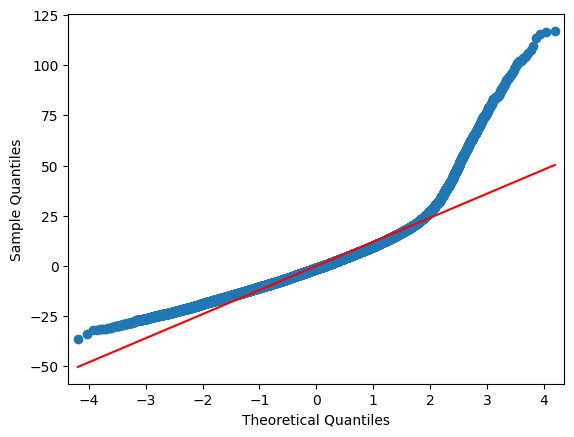

Shapiro-Wilk test p-value: <0.05


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [153]:
# Assumption 1: Normality of Residuals

# Q-Q plot
sm.qqplot(model_SSS.resid, line="s")
plt.show()
# Perform Shapiro-Wilk test and round the p-value
shapiro_test_SSS = shapiro(model_SSS.resid)
print("Shapiro-Wilk test p-value:", round_p_value(shapiro_test_SSS.pvalue))

In [154]:
# Assumption 2: Homogeneity of Variances

# Adding residuals to the DataFrame
data["resid_SSS"] = model_SSS.resid
# Grouping the residuals by "Semester"
groups = [group[1] for group in data.groupby("Semester")["resid_SSS"]]
# Perform Levene's test and round the p-value
levene_test_SSS = levene(*groups)
print(f"Levene's test: Statistic={levene_test_SSS.statistic}, p-value={round_p_value(levene_test_SSS.pvalue)}")

Levene's test: Statistic=1668.0160806901445, p-value=<0.05


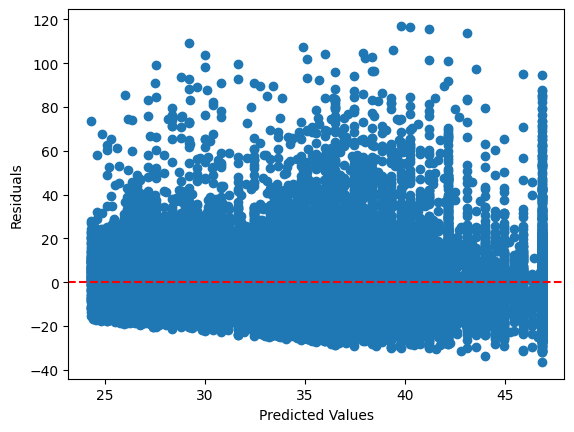

In [155]:
# Assumption 3: Linearity

# Make the scatter plot for the residuals
plt.scatter(model_SSS.fittedvalues, model_SSS.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

In [156]:
# Assumption 4: Homogeneity of Regression Slopes

# This can be checked on the ols model summary and/or the scatter plot from Assumption 3 and/or the interaction plot below

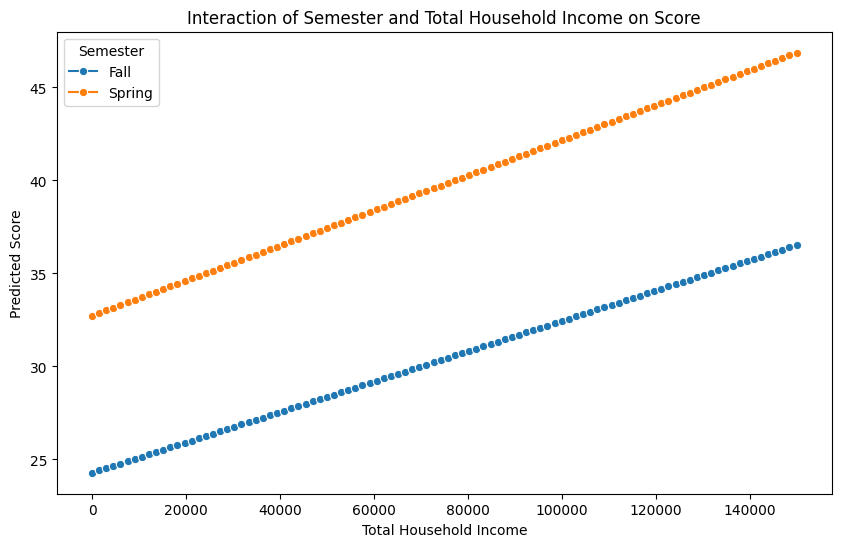

In [157]:
# Makt the interaction plot

# Predict scores across a range of TotalHouseholdIncome values for each Semester
income_range = np.linspace(data["TotalHouseholdIncome"].min(), data["TotalHouseholdIncome"].max(), 100)
semesters = data["Semester"].unique()
# Prepare a DataFrame for predictions
pred_data = pd.DataFrame({
    "TotalHouseholdIncome": np.tile(income_range, len(semesters)),
    "Semester": np.repeat(semesters, len(income_range))})
# Make predictions using the model
pred_data["Predicted_Score"] = model_SSS.predict(pred_data)
# Display the interaction plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_data, x="TotalHouseholdIncome", y="Predicted_Score", hue="Semester", marker="o")
plt.title("Interaction of Semester and Total Household Income on Score")
plt.xlabel("Total Household Income")
plt.ylabel("Predicted Score")
plt.show()

**One-Way ANCOVA: \\
Dependent Variable: Score \\
Groups: Subjects: Reading, Math, General Knowledge \\
Covariate: TotalHouseholdIncome**

In [158]:
# Fit ANCOVA model with interaction term
model_SSI = ols("Score ~ Subject * TotalHouseholdIncome", data=data).fit()
# Print the model summary
print(model_SSI.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     6350.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:07:50   Log-Likelihood:            -2.7343e+05
No. Observations:               71598   AIC:                         5.469e+05
Df Residuals:                   71592   BIC:                         5.469e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [159]:
# Perform Tukey's HSD test
mc_SSI = MultiComparison(data["Score"], data["Subject"])
tukey_result_SSI = mc_SSI.tukeyhsd()
# Display the summary
print(tukey_result_SSI.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1       group2 meandiff p-adj  lower   upper  reject
--------------------------------------------------------------
GeneralKnowledge    Math   6.8092   0.0  6.5627  7.0557   True
GeneralKnowledge Reading  16.0781   0.0 15.8316 16.3246   True
            Math Reading   9.2688   0.0  9.0223  9.5153   True
--------------------------------------------------------------


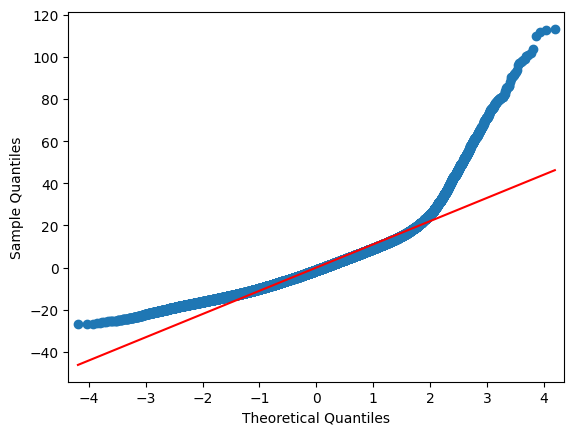

Shapiro-Wilk test p-value: <0.05


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [160]:
# Assumption 1: Normality of Residuals

# Q-Q plot
sm.qqplot(model_SSI.resid, line="s")
plt.show()
# Perform Shapiro-Wilk test and round tshe p-value
shapiro_test_SSI = shapiro(model_SSI.resid)
print("Shapiro-Wilk test p-value:", round_p_value(shapiro_test_SSI.pvalue))

In [161]:
# Assumption 2: Homogeneity of Variances

# Adding residuals to the DataFrame
data["resid_SSI"] = model_SSI.resid
# Grouping the residuals by "Subject"
groups = [group[1] for group in data.groupby("Subject")["resid_SSI"]]
# Perform Levene's test and round the p-value
levene_test_SSI = levene(*groups)
print(f"Levene's test: Statistic={levene_test_SSI.statistic}, p-value={round_p_value(levene_test_SSI.pvalue)}")

Levene's test: Statistic=1092.4531111196088, p-value=<0.05


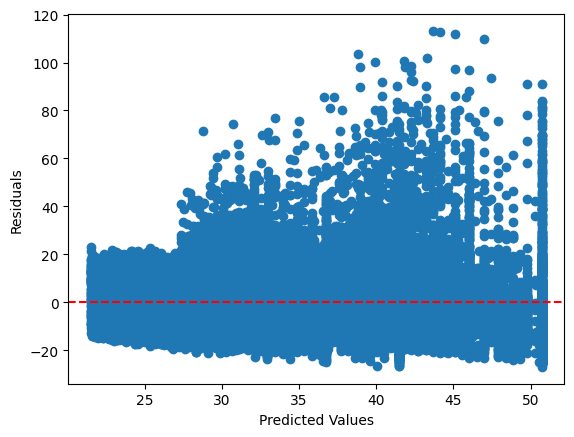

In [162]:
# Assumption 3: Linearity

# Make the scatter plot for the residuals
plt.scatter(model_SSI.fittedvalues, model_SSI.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

In [163]:
# Assumption 4: Homogeneity of Regression Slopes

# This can be checked on the ols model summary and/or the scatter plot from Assumption 3 and/or the interaction plot below

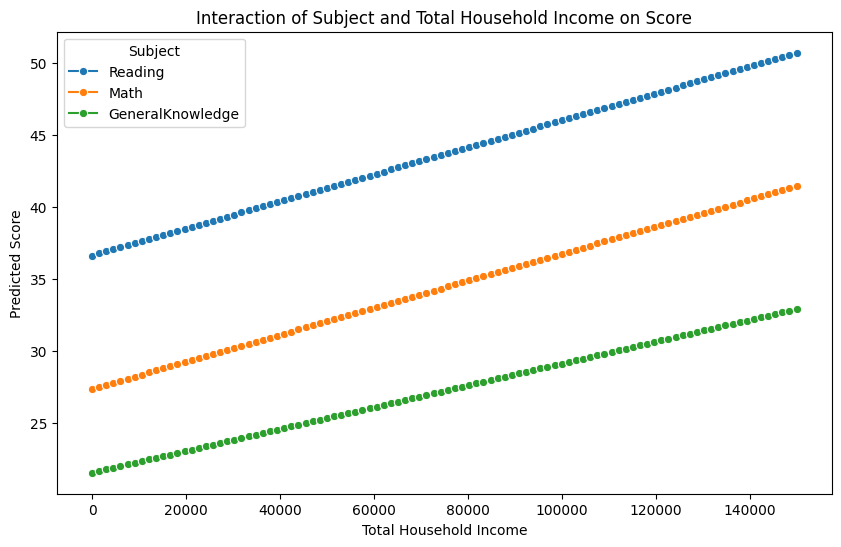

In [164]:
# Makt the interaction plot

# Generate predictions across a range of TotalHouseholdIncome values for each Subject
income_range = np.linspace(data["TotalHouseholdIncome"].min(), data["TotalHouseholdIncome"].max(), 100)
subjects = data["Subject"].unique()
# Prepare a DataFrame for predictions
pred_data = pd.DataFrame({
    "TotalHouseholdIncome": np.tile(income_range, len(subjects)),
    "Subject": np.repeat(subjects, len(income_range))})
# Add a constant for intercept terms (if necessary)
from statsmodels.api import add_constant
pred_data = add_constant(pred_data)
# Make predictions using the model
pred_data["Predicted_Score"] = model_SSI.predict(pred_data)
# Display the interaction plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_data, x="TotalHouseholdIncome", y="Predicted_Score", hue="Subject", marker="o")
plt.title("Interaction of Subject and Total Household Income on Score")
plt.xlabel("Total Household Income")
plt.ylabel("Predicted Score")
plt.legend(title="Subject")
plt.show()